# LB-Colloids Colloid particle tracking

LB-Colloids allows the user to perform colloid and nanoparticle tracking simulations on Computational Fluid Dynamics domains. As the user, you supply the chemical and physical properties, and the code performs the mathematics and particle tracking!

Let's set up our workspace to begin. And we will use the Synthetic5 example problem to parameterize run LB-Colloids

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from lb_colloids import LBImage, LB2DModel
from lb_colloids import ColloidModel, cIO

workspace = os.path.join("..", "data")
domain = "Synth100_5.png"
lb_name = "s5.hdf5"
endpoint = "s5.endpoint"

First thing, let's run a lattice Boltzmann model to get our fluid domain. For more details see the LB2D Notebook.

In [2]:
lbi = LBImage.Images(os.path.join(workspace, domain))
bc = LBImage.BoundaryCondition(lbi.arr, fluidvx=[253], solidvx=[0], nlayers=5)
lbm = LB2DModel(bc.binarized)
lbm.niters = 1000
lbm.run(output=os.path.join(workspace, lb_name), verbose=1000)

('Porosity: ', 0.5658)
1000
Iter: 01000
[Writing to: ../data/s5.hdf5]


array([[[ 0.11111111,  0.10675743,  0.10675767, ...,  0.10688719,
          0.10687231,  0.1068638 ],
        [ 0.11111111,  0.10643739,  0.10643744, ...,  0.10655803,
          0.10654706,  0.10654117],
        [ 0.11111111,  0.10611816,  0.10611812, ...,  0.10622977,
          0.10622256,  0.10621928],
        ..., 
        [ 0.11111111,  0.10772268,  0.10772394, ...,  0.10788608,
          0.10785408,  0.10783406],
        [ 0.11111111,  0.10740005,  0.10740089, ...,  0.10755076,
          0.10752572,  0.10751049],
        [ 0.11111111,  0.10707831,  0.10707881, ...,  0.10721789,
          0.10719848,  0.10718698]],

       [[ 0.02777778,  0.02673248,  0.02672616, ...,  0.02675012,
          0.02675083,  0.02675386],
        [ 0.02777778,  0.0266519 ,  0.02664637, ...,  0.02667237,
          0.02667324,  0.02667478],
        [ 0.02777778,  0.0265715 ,  0.02656687, ...,  0.02659396,
          0.02659484,  0.02659535],
        ..., 
        [ 0.02777778,  0.02697495,  0.02696769, ...,

## Setting up a Colloids particle tracking model

We can begin setting up a Colloids model by using the `ColloidsConfig()` class. This class ensures that valid values are supplied to particle tracking variables and allows the user to write an external particle tracking configuration file for documentation and later use if wanted.

Let's generate an empty `ColloidsConfig` instance



In [3]:
io = cIO.ColloidsConfig()

`ColloidsConfig()` uses dictionary keys to be parameterized. Common parameterization variables include

`lbmodel`: required parameter that points to the CFD fluid domain

`ncols`: required parameter that describes the number of colloids released

`iters`: number of time steps to simulate transport

`lbres`: the lattice Boltzmann simulation resolution in meters

`gridref`: optional grid refinement parameter, uses bi-linear interpolation

`ac`: colloid radius in meters

`timestep`: the timestep length in seconds. Recommend very small timesteps!

`continuous`: flag for continuous release. If 0 one release of colloids occurs, if > 0 a release of colloids occurs at continuous number of timesteps

`i`: fluid ionic strength in M

`print_time`: how often iteration progress prints to the screen

`endpoint`: endpoint file name to store breakthrough information

`store_time`: internal function that can be used to reduce memory requirements, a higher store_time equals less memory devoted to storing colloid positions (old positions are striped every store_time timesteps).

`zeta_colloid`: zeta potential of the colloid in V

`zeta_solid`: zeta potential of the solid in V

`plot`: boolean flag that generates a plot at the end of the model run

`showfig`: boolean flag that determines weather to show the figure or save it to disk

A complete listing of these are available in the user guide.

In [4]:
# model parameters
io["lbmodel"] = os.path.join(workspace, lb_name)
io['ncols'] = 2000
io['iters'] = 50000
io['lbres'] = 1e-6
io['gridref'] = 10
io['ac'] = 1e-06
io['timestep'] = 1e-06  # should be less than or equal to colloid radius!
io['continuous'] = 0

# chemical parameters
io['i'] = 1e-03  # Molar ionic strength of solution
io['zeta_colloid'] = -49.11e-3  # zeta potential of Na-Kaolinite at 1e-03 M NaCl
io['zeta_solid'] = -61.76e-3  # zeta potential of Glass Beads at 1e-03 M NaCl

# output control
io['print_time'] = 10000
io['endpoint'] = os.path.join(workspace, endpoint)
io['store_time'] = 100
io['plot'] = True
io['showfig'] = True

We can now look at the parameter dictionaries  `ColloidConfig` creates!

In [5]:
io.model_parameters, io.chemical_parameters, io.physical_parameters, io.output_control_parameters

({'AC': 1e-06,
  'CONTINUOUS': 0,
  'GRIDREF': 10.0,
  'ITERS': 50000,
  'LBMODEL': '../data/s5.hdf5',
  'LBRES': 1e-06,
  'NCOLS': 2000,
  'TIMESTEP': 1e-06},
 {'I': 0.001, 'ZETA_COLLOID': -0.04911, 'ZETA_SOLID': -0.06176},
 {},
 {'ENDPOINT': '../data/s5.endpoint',
  'PLOT': True,
  'PRINT_TIME': 10000,
  'SHOWFIG': True,
  'STORE_TIME': 100})

we can also write a config file for documentation and later runs! And see the information that will be written to the config file by using the `io.config` call

In [6]:
io.write(os.path.join(workspace, "s2.config"))
io.config

['START MODEL PARAMETERS\n',
 'AC: 1e-06\n',
 'NCOLS: 2000\n',
 'ITERS: 50000\n',
 'TIMESTEP: 1e-06\n',
 'CONTINUOUS: 0\n',
 'GRIDREF: 10.0\n',
 'LBMODEL: ../data/s5.hdf5\n',
 'LBRES: 1e-06\n',
 'END MODEL PARAMETERS\n\n',
 'START PHYSICAL PARAMETERS\n',
 'END PHYSICAL PARAMETERS\n\n',
 'START CHEMICAL PARAMETERS\n',
 'ZETA_COLLOID: -0.04911\n',
 'I: 0.001\n',
 'ZETA_SOLID: -0.06176\n',
 'END CHEMICAL PARAMETERS\n\n',
 'START OUTPUT CONTROL\n',
 'ENDPOINT: ../data/s5.endpoint\n',
 'PRINT_TIME: 10000\n',
 'SHOWFIG: True\n',
 'PLOT: True\n',
 'STORE_TIME: 100\n',
 'END OUTPUT CONTROL\n\n',
 'START MODEL PARAMETERS\n',
 'AC: 1e-06\n',
 'NCOLS: 2000\n',
 'ITERS: 50000\n',
 'TIMESTEP: 1e-06\n',
 'CONTINUOUS: 0\n',
 'GRIDREF: 10.0\n',
 'LBMODEL: ../data/s5.hdf5\n',
 'LBRES: 1e-06\n',
 'END MODEL PARAMETERS\n\n',
 'START PHYSICAL PARAMETERS\n',
 'END PHYSICAL PARAMETERS\n\n',
 'START CHEMICAL PARAMETERS\n',
 'ZETA_COLLOID: -0.04911\n',
 'I: 0.001\n',
 'ZETA_SOLID: -0.06176\n',
 'END CHEMICAL 

the `ColloidsConfig` can be directly be used with the `Config` reader to instanstiate a LB-Colloids model

In [7]:
config = cIO.Config(io.config)

and we can run the model using the `ColloidModel.run()` call

2000
(110, 102)
(110, 102)
(10000, '0.010')
(20000, '0.020')
(30000, '0.030')
(40000, '0.040')
(50000, '0.050')


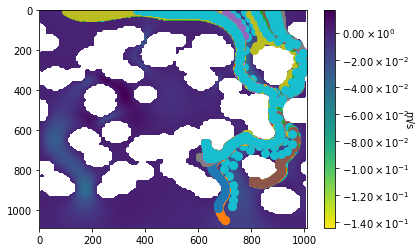

In [8]:
ColloidModel.run(config)

The output image shows the path of colloids which were immobilized in the model!

### For ColloidModel outputs please see the LB_Colloids_output_contol notebook